In [1]:
from ultralytics import YOLO
import os

# Load classification model config
model = YOLO(r"C:\ProgramData\anaconda3\Lib\site-packages\ultralytics\cfg\models\11\yolo11-cls.yaml")

# Train the model

model.train(
    data=r"C:\Users\vkr30\Image Segmentation_Plant Disease\PlantVillageY1500",
    epochs=150,
    imgsz=224,
    device=0,
    verbose=False,
    project='plant_disease_cls',
    name='yolov11_classifier',
    save=True
)  


WARNING no model scale passed. Assuming scale='n'.
YOLO11-cls summary: 86 layers, 2,812,104 parameters, 2,812,104 gradients, 4.3 GFLOPs
New https://pypi.org/project/ultralytics/8.3.206 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.200  Python-3.12.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\vkr30\Image Segmentation_Plant Disease\PlantVillageY1500, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0,

Exception in thread Thread-4 (_pin_memory_loop):
Traceback (most recent call last):
  File "C:\Users\vkr30\.conda\envs\Plant\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\vkr30\.conda\envs\Plant\Lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\vkr30\.conda\envs\Plant\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\vkr30\.conda\envs\Plant\Lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "C:\Users\vkr30\.conda\envs\Plant\Lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vkr30\.conda\envs\Plant\Lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
 

KeyboardInterrupt: 

In [37]:
# ✅ Evaluate model performance after 150 epochs
metrics = model.val(verbose=False)  # hides extra validation logs

# ✅ Clean and clear output
print("\n📊 Final Evaluation Metrics (after 150 epochs):")
print(f"🔹 Top-1 Accuracy: {metrics.top1 * 100:.2f}%")
print(f"🔹 Top-5 Accuracy: {metrics.top5 * 100:.2f}%")



📊 Final Evaluation Metrics (after 150 epochs):
🔹 Top-1 Accuracy: 97.33%
🔹 Top-5 Accuracy: 100.00%


In [1]:
# ✅ Save the best model weights after 150 epochs
import shutil
import os

# Define source and destination paths
src = r"C:\Users\vkr30\Image Segmentation_Plant Disease\plant_disease_cls\yolov11_classifier4\weights\best.pt"
dst = r"C:\Users\vkr30\Image Segmentation_Plant Disease\Yolov11 Variants for PDP\best.pt"

# Create destination folder if it doesn't exist
os.makedirs(os.path.dirname(dst), exist_ok=True)

# Copy the model file
shutil.copy(src, dst)

# ✅ Clean confirmation message
print("\n💾 Model saved successfully!")
print(f"📍 Location: {dst}")



💾 Model saved successfully!
📍 Location: C:\Users\vkr30\Image Segmentation_Plant Disease\Yolov11 Variants for PDP\best.pt


In [6]:
# ✅ Predict for a new image using the trained model
from ultralytics import YOLO
import torch

# Suppress verbose logging from Ultralytics
import logging, warnings
logging.getLogger("ultralytics").setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

# Load trained model
model_path = r"C:\Users\vkr30\Image Segmentation_Plant Disease\Yolov11 Variants for PDP\best.pt"
model = YOLO(model_path)

# Load image to predict
img_path = r"C:\Users\vkr30\Real-ESRGAN\results\56dc8448-9bd3-4055-8d53-7a898963c586___UF.GRC_YLCV_Lab 08422_out.JPG"

# Get prediction
results = model(img_path)
pred = results[0]

# Define class names
class_names = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Tomato_Bacterial_spot",
    "Tomato_Early_blight",
    "Tomato_Late_blight",
    "Tomato_Leaf_Mold",
    "Tomato_Septoria_leaf_spot",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato__Target_Spot",
    "Tomato__Tomato_YellowLeaf__Curl_Virus",
    "Tomato__Tomato_mosaic_virus",
    "Tomato_healthy"
]

# Map class names to prediction
pred.names = {i: name for i, name in enumerate(class_names)}

# Get top-1 class and confidence
class_idx = int(pred.probs.top1)
conf = pred.probs.data[class_idx].item()
cls_name = pred.names[class_idx]

# ✅ Print clean result
print("\n📷 Image Prediction Result:")
print(f"🔹 Predicted class: {cls_name}")
print(f"🔹 Confidence: {conf:.2f}")



📷 Image Prediction Result:
🔹 Predicted class: Tomato_Bacterial_spot
🔹 Confidence: 0.81


In [5]:
from ultralytics import YOLO
import torch
from sklearn.metrics import classification_report

# Load model
model = YOLO(r"C:\Users\vkr30\Image Segmentation_Plant Disease\Yolov11 Variants for PDP\best.pt")

# Load validation dataset path
val_path = r"C:\Users\vkr30\Image Segmentation_Plant Disease\PlantVillageY1500\test"

# Store true labels and predicted labels
true_labels = []
pred_labels = []

# Loop through validation images
import os
from PIL import Image

# Map folder names to indices
class_names = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Tomato_Bacterial_spot",
    "Tomato_Early_blight",
    "Tomato_Late_blight",
    "Tomato_Leaf_Mold",
    "Tomato_Septoria_leaf_spot",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato__Target_Spot",
    "Tomato__Tomato_YellowLeaf__Curl_Virus",
    "Tomato__Tomato_mosaic_virus",
    "Tomato_healthy"
]
class_to_idx = {name:i for i,name in enumerate(class_names)}

# Iterate over each class folder
for cls_name in os.listdir(val_path):
    cls_folder = os.path.join(val_path, cls_name)
    if not os.path.isdir(cls_folder):
        continue
    for img_file in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_file)
        # predict
        results = model(img_path)
        pred = int(results[0].probs.top1)
        pred_labels.append(pred)
        true_labels.append(class_to_idx[cls_name])

# Compute classification report
report = classification_report(true_labels, pred_labels, target_names=class_names)
print("\n✅ Classification Report for Validation Set (Top-1 Accuracy, 150 Epochs):\n")
print(report)



✅ Classification Report for Validation Set (Top-1 Accuracy, 150 Epochs):

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      0.90      0.95        20
                     Pepper__bell___healthy       1.00      1.00      1.00        20
                      Potato___Early_blight       1.00      1.00      1.00        20
                       Potato___Late_blight       0.95      1.00      0.98        20
                           Potato___healthy       1.00      1.00      1.00        20
                      Tomato_Bacterial_spot       0.95      1.00      0.98        20
                        Tomato_Early_blight       1.00      0.95      0.97        20
                         Tomato_Late_blight       0.86      0.95      0.90        20
                           Tomato_Leaf_Mold       0.95      1.00      0.98        20
                  Tomato_Septoria_leaf_spot       0.95      0.90      0.92

In [4]:
from sklearn.metrics import classification_report

# Initialize lists
true_labels = []
top5_preds = []

# Iterate over each class folder
for cls_name in os.listdir(val_path):
    cls_folder = os.path.join(val_path, cls_name)
    if not os.path.isdir(cls_folder):
        continue
    for img_file in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_file)
        results = model(img_path)
        # Use the built-in top5 attribute
        top5 = results[0].probs.top5
        top5_preds.append(top5)
        # True label
        true_labels.append(class_to_idx[cls_name])

# Simulate Top-5 evaluation: correct if true label is in top-5
top5_eval_preds = [
    true_labels[i] if true_labels[i] in top5_preds[i] else top5_preds[i][0]
    for i in range(len(true_labels))
]

# Generate Top-5 classification report
print("\n✅ Classification Report for Validation Set (Top-5 Accuracy, 150 Epochs):\n")
print(classification_report(true_labels, top5_eval_preds, target_names=class_names, digits=4))



✅ Classification Report for Validation Set (Top-5 Accuracy, 150 Epochs):

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot     1.0000    1.0000    1.0000        20
                     Pepper__bell___healthy     1.0000    1.0000    1.0000        20
                      Potato___Early_blight     1.0000    1.0000    1.0000        20
                       Potato___Late_blight     1.0000    1.0000    1.0000        20
                           Potato___healthy     1.0000    1.0000    1.0000        20
                      Tomato_Bacterial_spot     1.0000    1.0000    1.0000        20
                        Tomato_Early_blight     1.0000    1.0000    1.0000        20
                         Tomato_Late_blight     1.0000    1.0000    1.0000        20
                           Tomato_Leaf_Mold     1.0000    1.0000    1.0000        20
                  Tomato_Septoria_leaf_spot     1.0000    1.0000    1.0000

In [6]:
#Confusion Matrix
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from ultralytics import YOLO

# Load your classification model
#model = YOLO("path/to/yolo11-mha.pt")  # or yolo11-mha-cbam.pt
model=YOLO(r"C:\Users\vkr30\Image Segmentation_Plant Disease\Yolov11 Variants for PDP\best.pt")

# Set your validation directory
val_dir = r"C:\Users\vkr30\Image Segmentation_Plant Disease\PlantVillageY1500\train"  # or your path

# Define transforms (must match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load validation data
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
class_names = val_dataset.classes  # to label confusion matrix

In [7]:
true_labels = []
pred_labels = []

# Make sure model is in eval mode
model.model.eval()

for img_path, label in val_dataset.samples:
    results = model(img_path)  # YOLO expects path or PIL/np array
    predicted = int(results[0].probs.top1)  # Top-1 predicted class index
    pred_labels.append(predicted)
    true_labels.append(label)

print("✅ Top-1 predictions collected for all validation images.")


✅ Top-1 predictions collected for all validation images.


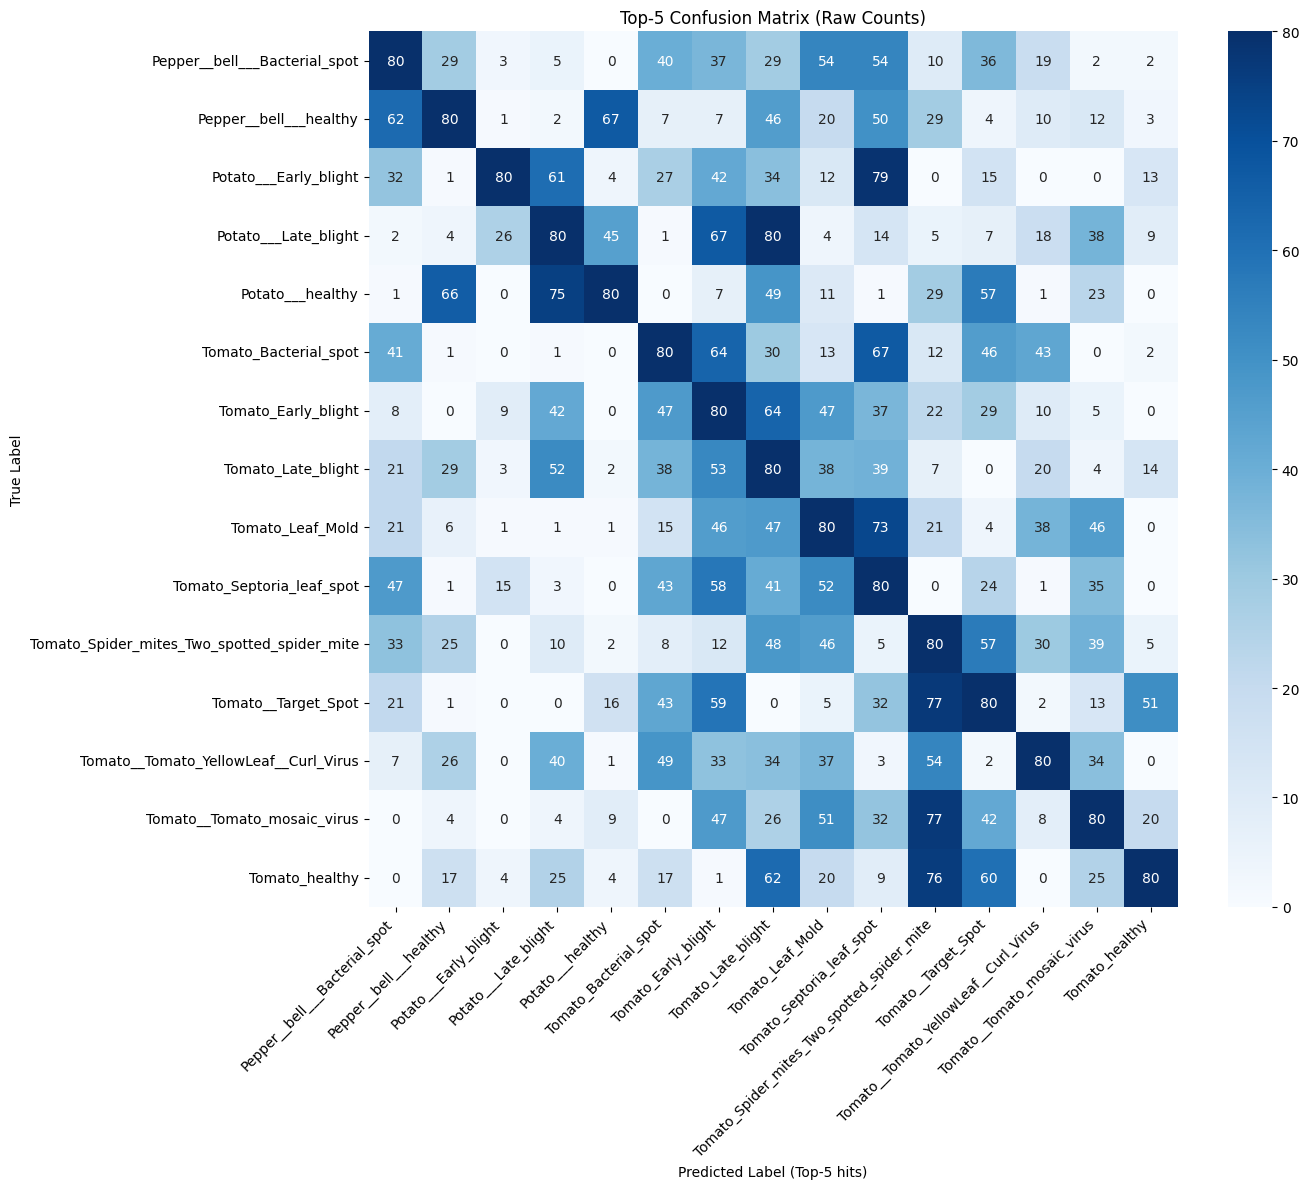

✅ Confusion matrix saved at: C:\Users\vkr30\Image Segmentation_Plant Disease\plant_disease_cls\Top5_Confusion_Matrix.png


In [8]:
%matplotlib inline
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ultralytics import YOLO

# --- ✅ Config ---
model_path = r"C:\Users\vkr30\Image Segmentation_Plant Disease\Yolov11 Variants for PDP\best.pt"
data_dir = r"C:\Users\vkr30\Image Segmentation_Plant Disease\PlantVillageY1500\train"
img_size = 224
batch_size = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
save_path = r"C:\Users\vkr30\Image Segmentation_Plant Disease\plant_disease_cls\Top5_Confusion_Matrix.png"

# --- ✅ Transform ---
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

# --- ✅ Dataset & DataLoader ---
val_dataset = ImageFolder(root=data_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
class_names = val_dataset.classes
num_classes = len(class_names)

# --- ✅ Load YOLOv11 classification model ---
model = YOLO(model_path)
model.to(device).eval()

# --- ✅ Inference loop for Top-5 predictions ---
top5_preds, true_labels = [], []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        results = model(images, verbose=False)

        for result, label in zip(results, labels):
            probs = result.probs.data  # shape: [num_classes]
            top5 = torch.topk(probs, k=5).indices.cpu().numpy()
            top5_preds.append(top5)
            true_labels.append(label.item())

# --- ✅ Generate Top-5 Confusion Matrix (Raw Counts) ---
confusion_top5 = np.zeros((num_classes, num_classes), dtype=int)
for true, top5 in zip(true_labels, top5_preds):
    for pred in top5:
        confusion_top5[true, pred] += 1

# --- ✅ Plot and save confusion matrix ---
plt.figure(figsize=(14, 12))
sns.heatmap(confusion_top5, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label (Top-5 hits)")
plt.ylabel("True Label")
plt.title("Top-5 Confusion Matrix (Raw Counts)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Confusion matrix saved at: {save_path}")
